In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('walmart_stock.csv')

In [17]:
df.head()

Date       Open       High        Low      Close    Volume  Adj Close
0  2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
1  2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2  2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
3  2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
4  2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

In [18]:
#taking a look at all the columns and types
#we see that the date is an object here (not a string or datetime)
#so lets convert to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [19]:
#in our case, the date is in the format yyyy-mm-dd
#so we can use this code
#if it's not, you can add code in to_datetime to convert properly
df['Date']=pd.to_datetime(df['Date'])

In [20]:
#now its in a datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [21]:
#now you can make it an index
#and make it a permanent change
df.set_index('Date',inplace=True)

In [22]:
df

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
...               ...        ...        ...        ...       ...        ...
2016-12-23  69.430000  69.750000  69.360001  69.540001   4803900  69.032411
2016-12-27  69.300003  69.820000  69.250000  69.699997   4435700  69.191240
2016-12-28  69.940002  70.000000  69.260002  69.309998   4875700  68.804087
2016-12-29  69.209999  69.519997  69.120003  69.260002   4298400  68.754456
2016-12-30  69.120003  69.430000  68.830002  69.120003   6889500  68.615479

[1258 rows x 6 columns]

In [11]:
# above was the long way to set dates to datetime
# if the dates are already in the expected format
# you might be able to just indicate below parse_dates = True
# but not as "controllable"
df = pd.read_csv('walmart_stock.csv',index_col='Date',parse_dates = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [23]:
df.resample(rule='A')

In [24]:
# here you can resample based the years
# there are many rules, 'A' is just for the years
df.resample(rule='A').mean()


Open       High        Low      Close        Volume  \
Date                                                                   
2012-12-31  67.158680  67.602120  66.786520  67.215120  9.239015e+06   
2013-12-31  75.264048  75.729405  74.843055  75.320516  6.951496e+06   
2014-12-31  77.274524  77.740040  76.864405  77.327381  6.515612e+06   
2015-12-31  72.569405  73.064167  72.034802  72.491111  9.040769e+06   
2016-12-31  69.481349  70.019643  69.023492  69.547063  9.371645e+06   

            Adj Close  
Date                   
2012-12-31  59.389349  
2013-12-31  68.147179  
2014-12-31  71.709712  
2015-12-31  68.831426  
2016-12-31  68.054229

In [25]:
# now instead of the mean
# what if i wanted to get the first entry in the year
# i could define a function, and them apply it to the resample
def first_day(entry):
    return entry[0]

In [26]:
#now apply first_date to the resample
df.resample('A').apply(first_day)

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-12-31  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2013-12-31  68.930000  69.239998  68.449997  69.239998  10390800  61.879708
2014-12-31  78.720001  79.470001  78.500000  78.910004   6878000  72.254228
2015-12-31  86.269997  86.720001  85.550003  85.900002   4501800  80.624861
2016-12-31  60.500000  61.490002  60.360001  61.459999  11989200  59.289713

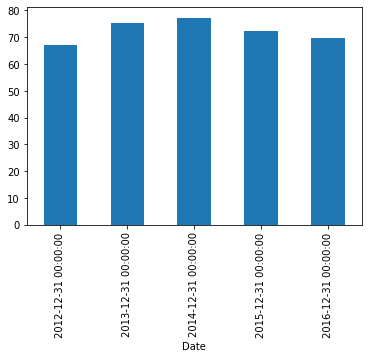

In [27]:
# using resample, you can also create charts
# choose a column (close) and a function of resample
# and apply it to a bar chart
df['Close'].resample('A').mean().plot(kind='bar')